# Predicting the sales price of Bulldozer using Machine Learning 🚜

## 1. Problem definition

 How well we can predict the sales price of a bulldozer using certain attributes and previous data of how similiar bulldozers that were sold?

## 2. Data 

The data is downloaded from Kaggle Blue book for Bulldozers

https://www.kaggle.com/c/bluebook-for-bulldozers

## 3. Evaluation

The evalution metrics used is RMSLE(root mean square log error) between actual and predicted price

## 4. Features

A data dictionary is provided which defines all the features of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/TrainAndValid.csv',low_memory=False,parse_dates=['saledate'])

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SalesID,412698.0,2.011161e+06,1.080068e+06,1139246.0,1421897.75,1645852.5,2261012.50,6333349.0
SalePrice,412698.0,3.121518e+04,2.314174e+04,4750.0,14500.00,24000.0,40000.00,142000.0
MachineID,412698.0,1.230061e+06,4.539533e+05,0.0,1088593.25,1284397.0,1478079.25,2486330.0
ModelID,412698.0,6.947202e+03,6.280825e+03,28.0,3261.00,4605.0,8899.00,37198.0
datasource,412698.0,1.351694e+02,9.646749e+00,121.0,132.00,132.0,136.00,173.0
auctioneerID,392562.0,6.585268e+00,1.715841e+01,0.0,1.00,2.0,4.00,99.0
YearMade,412698.0,1.899050e+03,2.921902e+02,1000.0,1985.00,1995.0,2001.00,2014.0
MachineHoursCurrentMeter,147504.0,3.522988e+03,2.716993e+04,0.0,0.00,0.0,3209.00,2483300.0


In [6]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

<AxesSubplot:>

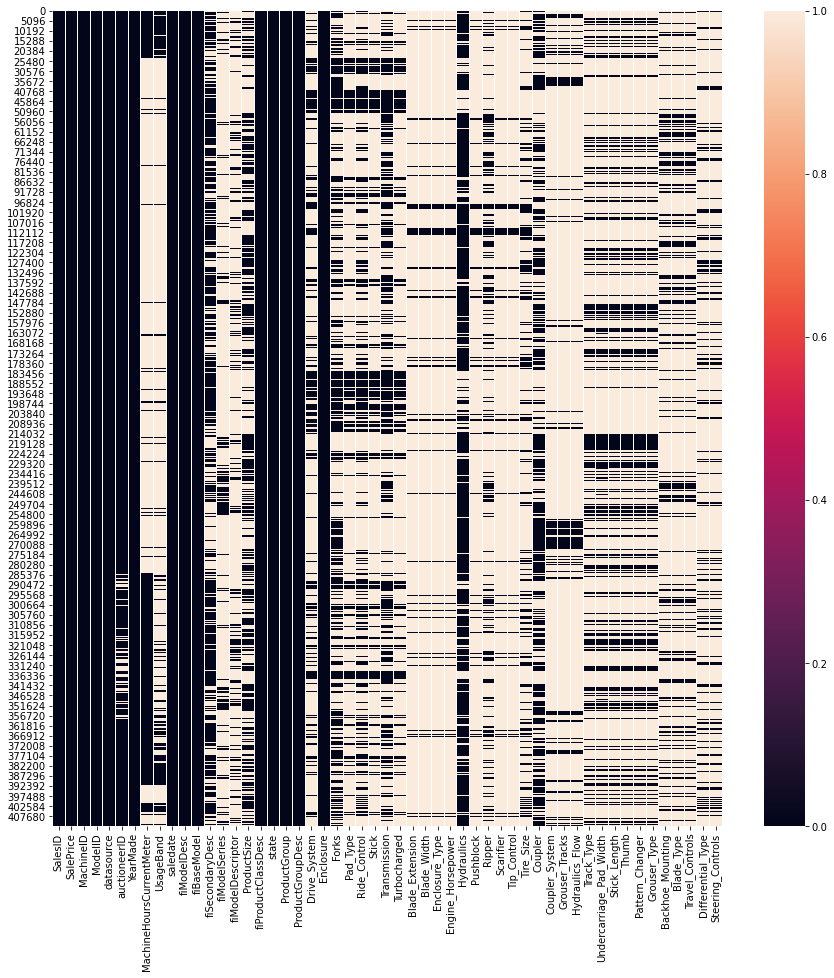

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(df.isna())

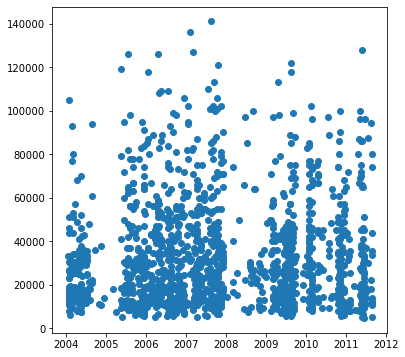

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(df['saledate'][:1500],df['SalePrice'][:1500])

(array([151074., 119019.,  58000.,  32444.,  22876.,  13474.,   9330.,
          3884.,   2036.,    561.]),
 array([  4750.,  18475.,  32200.,  45925.,  59650.,  73375.,  87100.,
        100825., 114550., 128275., 142000.]),
 <BarContainer object of 10 artists>)

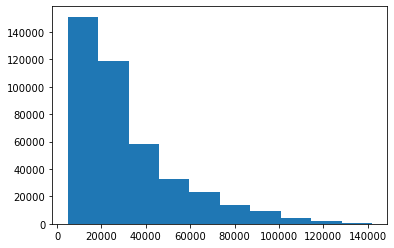

In [9]:
plt.hist(df['SalePrice'])

In [10]:
#Sort df by SalePrice
df.sort_values(by=['saledate'],inplace=True)
df.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

### Creating a copy of original data

We create a copy of original data and store it into a another dataframe for manipulation purpose.

In [11]:
temp_df = df.copy()

In [12]:
temp_df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Adding date and time attributes using saledate column

In [13]:
temp_df['saleYear']= temp_df.saledate.dt.year
temp_df['saleMonth']= temp_df.saledate.dt.month
temp_df['saleDay']= temp_df.saledate.dt.day
temp_df['saleDayofWeek']= temp_df.saledate.dt.dayofweek
temp_df['saleDayofYear']= temp_df.saledate.dt.dayofyear

In [14]:
temp_df.head().transpose()

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [15]:
# Now we can remove our saledate column from our dataset
temp_df.drop('saledate',axis=1,inplace=True)

In [16]:
temp_df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleDay', 'saleDayofWeek', 'saleDayofYear'],
      dtype

In [17]:
#Checking the value count for every state.
temp_df['state'].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

### Converting string inputs into categories

String variables are needed to be convert into categories so that we can get pattern out of it.

In [18]:
#Finding the columns which contains string variable
for label, content in temp_df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [19]:
for label, content in temp_df.items():
    if pd.api.types.is_string_dtype(content):
        temp_df[label]=content.astype('category').cat.as_ordered()

In [20]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

Checking the percentage of missing values per column

In [21]:
temp_df.isna().sum()/len(temp_df)*100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

### Saving the preprocessed data

We are saving the preprocessed data so that we can use the data later.

In [23]:
temp_df.to_csv('Final_temp_df.csv',index=False)

In [24]:
temp_df = pd.read_csv('Final_temp_df.csv',low_memory=False)

In [25]:
temp_df.head().transpose()

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### Filling the missing values

We will be replacing NA values with median and will remove rows having lots of missing values.

In [26]:
# Finding the numeric columns having NA values
for label, content in temp_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [27]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [28]:
# Filling numeric rows with median value
for label, content in temp_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Adding a column which tell us if data was missing or not
            temp_df[label+'_Is_missing'] = pd.isnull(content)
            # filling missing value with median value
            temp_df[label] = content.fillna(content.median())
        

In [29]:
temp_df.head().transpose()

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [30]:
#Checking the number of missing values 
print(temp_df['auctioneerID_Is_missing'].value_counts())
print(temp_df['MachineHoursCurrentMeter_Is_missing'].value_counts())

False    392562
True      20136
Name: auctioneerID_Is_missing, dtype: int64
True     265194
False    147504
Name: MachineHoursCurrentMeter_Is_missing, dtype: int64


### Turning categorical variables into numeric

In [32]:
# Finding columns which are not numeric
for label, content in temp_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [33]:
# Turning categorical variables into numeric and filling NA values
for label, content in temp_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Adding a column to check if data was missing or not
        temp_df[label + 'Is_missing'] = pd.isnull(content)
        # Turning categorical variables into numeric
        temp_df[label] = pd.Categorical(content).codes+1

In [34]:
temp_df.head().transpose()

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_MountingIs_missing,False,True,False,True,False
Blade_TypeIs_missing,False,True,False,True,False
Travel_ControlsIs_missing,False,True,False,True,False
Differential_TypeIs_missing,True,False,True,False,True


In [35]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_ControlsIs_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [36]:
temp_df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_WidthIs_missing,Stick_LengthIs_missing,ThumbIs_missing,Pattern_ChangerIs_missing,Grouser_TypeIs_missing,Backhoe_MountingIs_missing,Blade_TypeIs_missing,Travel_ControlsIs_missing,Differential_TypeIs_missing,Steering_ControlsIs_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [38]:
temp_df.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_MountingIs_missing     0
Blade_TypeIs_missing           0
Travel_ControlsIs_missing      0
Differential_TypeIs_missing    0
Steering_ControlsIs_missing    0
Length: 103, dtype: int64

##### Since we have our dataset in numerical form so we can execute our machine learning model upon it.

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(temp_df.drop('SalePrice', axis=1), temp_df['SalePrice'])

# Model score
model.score(temp_df.drop('SalePrice', axis=1),temp_df['SalePrice'])

Wall time: 2min 29s


0.9875468079970562

### Splitting dataset into train and validation set

In [41]:
temp_df['saleYear'].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [53]:
train_df = temp_df[temp_df['saleYear'] != 2012] 
valid_df = temp_df[temp_df['saleYear'] == 2012] 

In [56]:
print(len(train_df))
print(len(valid_df))

401125
11573


In [57]:
from sklearn.model_selection import train_test_split

In [59]:
X_train , y_train = train_df.drop('SalePrice',axis=1), train_df.SalePrice
X_valid , y_valid = valid_df.drop('SalePrice',axis=1), valid_df.SalePrice

In [63]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(401125, 102) (401125,)
(11573, 102) (11573,)


### Creating an evaluation function


This function will help to check the loss and accuracy after training the model. Also, it will help to analyse the efficency of the model.

In [65]:
# Creating an evaluation function

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle( y_test, y_pred):
    
    return np.sqrt(mean_squared_log_error(y_test,y_pred))

#Create function to evaluate model using different scores
def show_scores(model):
    
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_valid)
    score = {'Training MAE' : mean_absolute_error(y_train, train_pred),
             'Valid MAE' : mean_absolute_error(y_valid, val_pred),
             'Training RMSLE' : rmsle(y_train, train_pred),
             'Valid RMSLE': rmsle(y_valid, val_pred),
             'Training R^2': r2_score(y_train, train_pred),
             'Valid R^2' : r2_score(y_valid, val_pred)}
    return score

                   

### Testing our model on a subset (for tuning the hyperparameters)

In [82]:

%%time

model = RandomForestRegressor(n_jobs = -1, random_state=101,max_samples=10000)



Wall time: 0 ns


In [83]:
model.fit(X_train,y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=101)

In [85]:
(X_train.shape[0] * 100) / 1000000

40.1125

In [84]:
10000 * 100

1000000

In [86]:
show_scores(model)

{'Training MAE': 5565.492636185728,
 'Valid MAE': 7202.2176255076465,
 'Training RMSLE': 0.2574237377693566,
 'Valid RMSLE': 0.29384532184203305,
 'Training R^2': 0.8601038118286826,
 'Valid R^2': 0.831154165922877}

### Tuning hyperparameters using RandomizedSearchCV

In [114]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# RandomForestRegressor having different hyperparameters
rf_grid = {'n_estimators': np.arange(10,100,10),
           'max_depth': [None, 3,5,10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2),
           'max_features': [0.5, 1, 'sqrt', 'auto'],
           'max_samples': [10000]}

# Instantiate Randomized search cv
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions = rf_grid,
                              n_iter = 2,
                              cv =5, 
                              verbose = True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.3min finished


Wall time: 1min 25s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [115]:
#finding the best hyperparameter for model
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 13,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 5}

In [116]:
#Evalute the Randomized search model
show_scores(rs_model)

{'Training MAE': 11715.995657440473,
 'Valid MAE': 13580.973608120505,
 'Training RMSLE': 0.5035527494308487,
 'Valid RMSLE': 0.5156582669859507,
 'Training R^2': 0.48851706292928754,
 'Valid R^2': 0.48613969312515126}

### Train the model with the best hyperparameters

Note: these hyperparameter were obtained after 100 iterations of RandomizedSearchCV

In [118]:
%%time

#most idealized hyperparameters
idealize_model = RandomForestRegressor(n_estimators = 40,
                                      min_samples_split=12,
                                      min_samples_leaf=2,
                                       n_jobs=-1,
                                      max_samples=None,
                                      max_features=0.5,
                                      random_state=42)

#Fit the model
idealize_model.fit(X_train,y_train)

Wall time: 30.8 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=2,
                      min_samples_split=12, n_estimators=40, n_jobs=-1,
                      random_state=42)

In [119]:
#Comparing scores of idealize model and normal model

print(show_scores(idealize_model))
print(show_scores(rs_model))


{'Training MAE': 2909.5517667002637, 'Valid MAE': 5906.158078978154, 'Training RMSLE': 0.14435960855628183, 'Valid RMSLE': 0.2442626100804609, 'Training R^2': 0.9585838892028752, 'Valid R^2': 0.8830636113037851}
{'Training MAE': 11715.995657440473, 'Valid MAE': 13580.973608120505, 'Training RMSLE': 0.5035527494308487, 'Valid RMSLE': 0.5156582669859507, 'Training R^2': 0.48851706292928754, 'Valid R^2': 0.48613969312515126}


### Making prediction on test data

In [133]:
test_df = pd.read_csv('Data/Test.csv',low_memory=False,parse_dates=['saledate'])
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [134]:

def preprocess_data(df):


    '''
    Performs transformations on df and return transformed dataframe
    '''
    df['saleYear']= df.saledate.dt.year
    df['saleMonth']= df.saledate.dt.month
    df['saleDay']=  df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    df['saleDayOfYear'] = df.saledate.dt.dayofyear
    
    df.drop('saledate',axis=1, inplace=True)
    
    #  Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing
                df[label+'_is_missing'] = pd.isnull(content)
                # Fill missing numeric values with the median 
                df[label] = content.fillna(content.median())
    
        # Filled categorical values missing data and turned into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+'_is_missing'] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing catefories
            df[label] = pd.Categorical(content).codes+1
    
    
    return df

In [136]:
#preprocessing the dataset
test_df = preprocess_data(test_df)

In [138]:
#difference in the number of colums in test data set and train dataset
set(X_train.columns) - set(test_df.columns)

{'Backhoe_MountingIs_missing',
 'Blade_ExtensionIs_missing',
 'Blade_TypeIs_missing',
 'Blade_WidthIs_missing',
 'CouplerIs_missing',
 'Coupler_SystemIs_missing',
 'Differential_TypeIs_missing',
 'Drive_SystemIs_missing',
 'EnclosureIs_missing',
 'Enclosure_TypeIs_missing',
 'Engine_HorsepowerIs_missing',
 'ForksIs_missing',
 'Grouser_TracksIs_missing',
 'Grouser_TypeIs_missing',
 'HydraulicsIs_missing',
 'Hydraulics_FlowIs_missing',
 'MachineHoursCurrentMeter_Is_missing',
 'Pad_TypeIs_missing',
 'Pattern_ChangerIs_missing',
 'ProductGroupDescIs_missing',
 'ProductGroupIs_missing',
 'ProductSizeIs_missing',
 'PushblockIs_missing',
 'Ride_ControlIs_missing',
 'RipperIs_missing',
 'ScarifierIs_missing',
 'Steering_ControlsIs_missing',
 'StickIs_missing',
 'Stick_LengthIs_missing',
 'ThumbIs_missing',
 'Tip_ControlIs_missing',
 'Tire_SizeIs_missing',
 'Track_TypeIs_missing',
 'TransmissionIs_missing',
 'Travel_ControlsIs_missing',
 'TurbochargedIs_missing',
 'Undercarriage_Pad_WidthIs_mis

In [139]:
test_df['auctioneerID_Is_missing'] = False
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_Is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally we can perform predictions on our test dataset.

In [140]:
#making prediction on test dataset
test_pred = idealize_model.predict(test_df)

In [141]:
pred_df = pd.DataFrame()
pred_df['SalesID']= test_df['SalesID']
pred_df['SalesPrice']= test_pred
pred_df

,SalesID,SalesPrice
0,1227829,22803.265929
1,1227844,21059.960978
2,1227847,49515.499880
3,1227848,62838.706491
4,1227863,43955.431464
...,...,...
12452,6643171,46782.525879
12453,6643173,17520.453434
12454,6643184,13860.834769
12455,6643186,19550.809183


### Feature Importance

Using feature importance we can find out the attributes which are significant in predicting our model.

In [145]:
len(idealize_model.feature_importances_)

102

In [154]:
def imp_features(columns, importances, n=20):
    df= (pd.DataFrame({'features':columns,
                       'feature_importances': importances})
        .sort_values('feature_importances',ascending=False)
        .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n],df['feature_importances'][:20])
    ax.invert_yaxis()

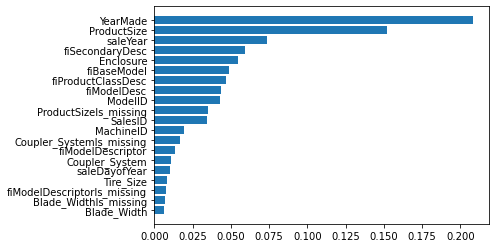

In [155]:
imp_features(X_train.columns, idealize_model.feature_importances_)